<a href="https://colab.research.google.com/github/lucaspn017/Testing_hypotheses/blob/main/Testing_hypothesys_StudentScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inicialmente**: Vamos aplicar o teorema do limite central, para enterdermos o quão fiel as médias amostrais serão em relação as médias populacionais.

> Para tal, os seguintes requisitos devem ser obedecidos:

* *O número de dados da amostra (n) deve ser suficientemente grande (n≽30).*

* *A distribuição populacional deve ser aproximadamente normal e simétrica.*

* *A extração das amostras deve se dar de forma aleatória e independente.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikramamin/student-score-hypothesis-testing-t-test")

print("Path to dataset files:", path)

100%|██████████| 7.16k/7.16k [00:00<00:00, 2.97MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vikramamin/student-score-hypothesis-testing-t-test/versions/1


In [3]:
print(os.listdir(path))
students = pd.read_csv(f"{path}/student-mat.csv")

['student-mat.csv']


In [4]:
students_df = pd.DataFrame(students)
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
students_df.isnull().sum()
students_df.info()
students_df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,0
0,False
1,False
2,False
3,False
4,False
...,...
390,False
391,False
392,False
393,False


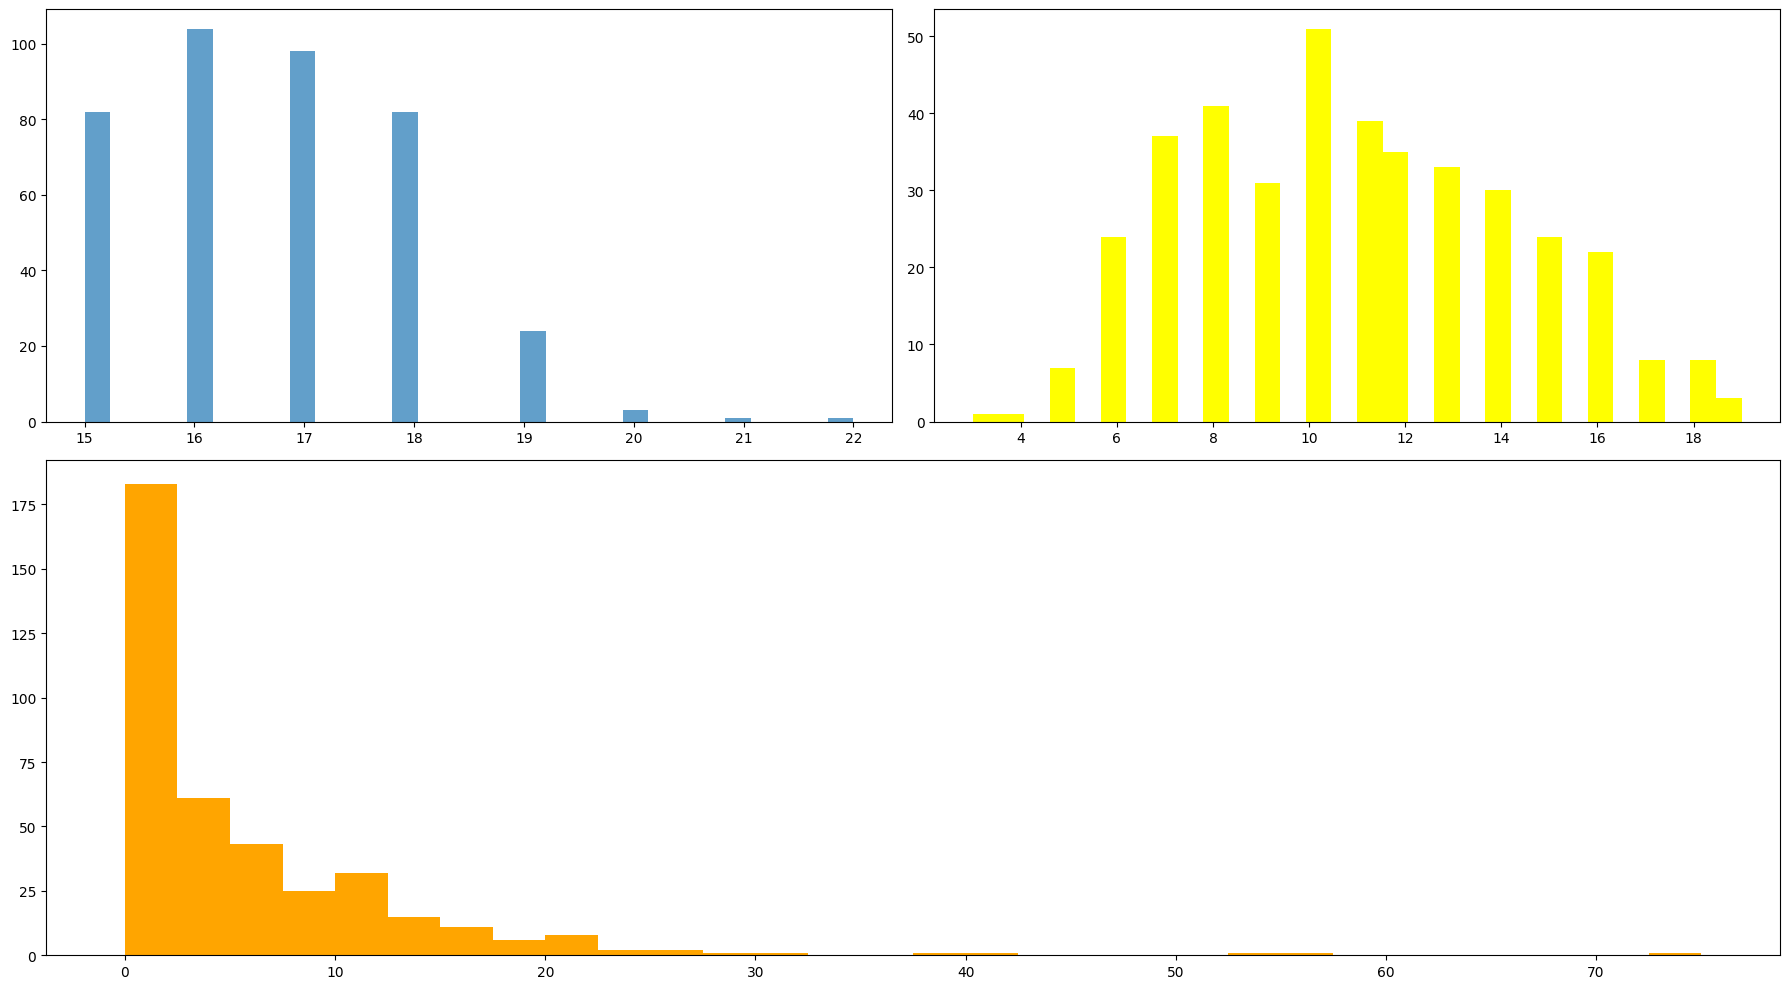

395 395 395


In [6]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

# Gráfico G1
ax1 = fig.add_subplot(gs[0, 0])
plt.hist(students_df['age'], bins=30, alpha=0.7)

# Gráfico G2
ax2 = fig.add_subplot(gs[0, 1])
plt.hist(students_df['G1'], bins=30, color='yellow')

# Gráfico G3 ocupa linha inferior inteira
ax3 = fig.add_subplot(gs[1, :])
plt.hist(students_df['absences'], bins=30, color='orange')

plt.tight_layout()
plt.show()
print(len(students_df['age']),len(students_df['G1']),len(students_df['absences']))

# **Rearranging the mean of the datas.**


In [7]:
n = 100
qnt = 395

def reamostragem(dados, coluna, n, qnt):
  medias = [dados[coluna].sample(n, replace=True).mean() for _ in range(qnt)] # Como estou dispensando a utilização do índice, então
  return medias

In [8]:
media_idade = reamostragem(students_df, 'age', n, qnt)
media_notaG1 = reamostragem(students_df,'G1', n, qnt)
media_absences = reamostragem(students_df,'absences', n, qnt)

# Now, let´s calculate the average to each data previously mentioned, to verify the aprocimation with the sample averages.

In [9]:
print("***Médias populacionais***")
print(np.round(students_df['age'].mean(),5))
print(np.round(students_df['G1'].mean(),5))
print(np.round(students_df['absences'].mean(),5))

***Médias populacionais***
16.6962
10.90886
5.70886


In [10]:
def Average(list):
  return sum(list)/len(list)

print('***Médias amostrais***')

print(np.round(Average(media_idade),5))
print(np.round(Average(media_notaG1),5))
print(np.round(Average(media_absences),5))

***Médias amostrais***
16.69841
10.92162
5.66603


It's possible to verify that, once the samples obey the requirements to the LCT, the distributions of these averages was approximately normal.

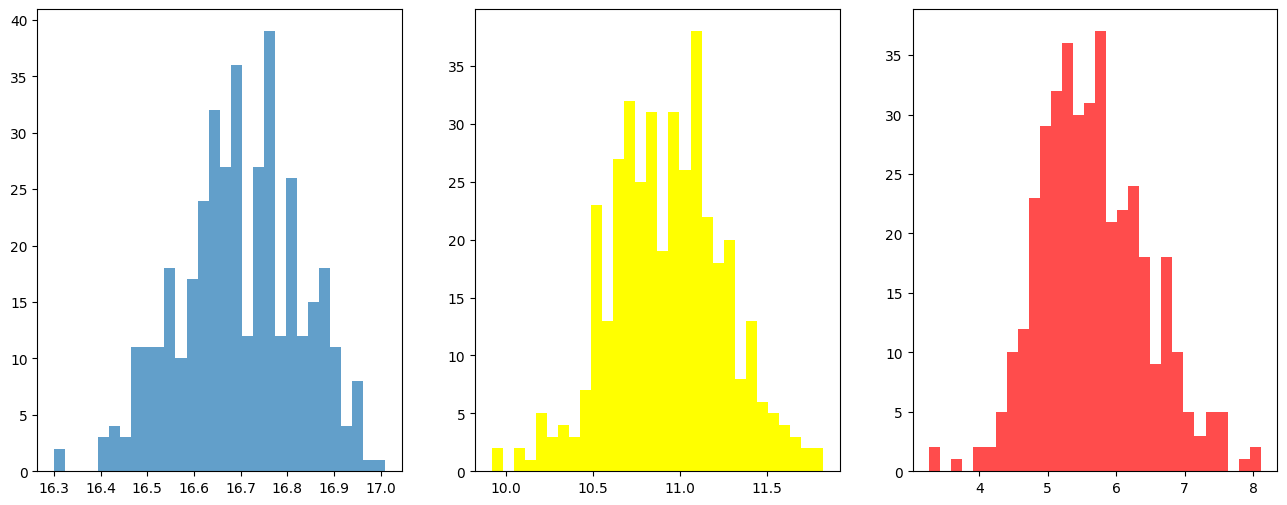

In [11]:
plt.subplots(nrows=1, ncols=3, figsize=(16,6))
plt.subplot(131)
plt.hist(media_idade, bins=30, alpha=0.7)
plt.subplot(132)
plt.hist(media_notaG1, bins=30, color='yellow')
plt.subplot(133)
plt.hist(media_absences, bins=30, alpha=0.7, color='red')

plt.show()

In [12]:
medNotaG1 = pd.DataFrame({'media_notaG1':media_notaG1})
medNotaG1

,media_notaG1
0,11.47
1,10.88
2,10.62
3,11.00
4,10.46
...,...
390,10.97
391,10.65
392,11.02
393,11.00


## Ao se verificar a média das notas para uma nova amostra, tem-se que o valor resultante foi de: 8.

In [13]:
# Vamos verificar se a média das amostras
# é equivalente a média da população.


media_das_medias = medNotaG1['media_notaG1'].mean()
EP = medNotaG1['media_notaG1'].std()

print('*** Medidas amostrais ***')
print(f'Média das amostras: {media_das_medias:.5f}')
print(f'Erro padrão: {EP:.5f}')

*** Medidas amostrais ***
Média das amostras: 10.92162
Erro padrão: 0.32828


In [14]:
11-3*EP

10.015154593102688

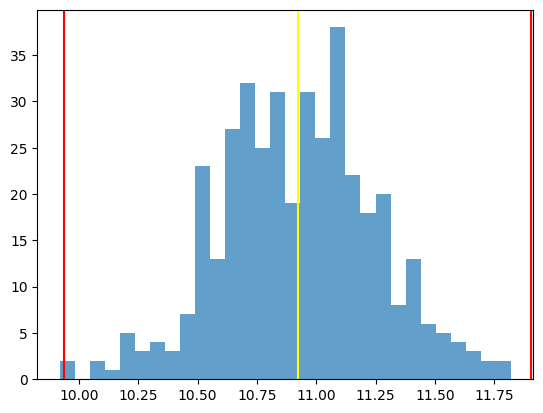

In [15]:
plt.hist(media_notaG1, bins = 30, alpha=0.7)
plt.axvline(media_das_medias, color='yellow')
plt.axvline(media_das_medias-3*EP, color='red')
plt.axvline(media_das_medias+3*EP, color='red')
plt.show()

In [16]:
qnt_obs = medNotaG1[(medNotaG1 > media_das_medias-3*EP) & (medNotaG1 < media_das_medias+3*EP)]

# **About 99.49% of the data falls within the defined area.**
> This means that I could ask the principal or other school administrators to take a closer look at the learning methodology, for example.

> The new average falls outside the majority of the data, with an accuracy of 99.49%.

In [17]:
percObs = (qnt_obs.count()/medNotaG1.count())*100
print(percObs)

media_notaG1    99.746835
dtype: float64


# In that way, let´s define a confidence interval: 95%.

In [18]:
from scipy import stats
students_df['G1']
interConf = 0.95

In [19]:
media = students_df['G1'].mean()
desvPad = students_df['G1'].std()
tam = len(students_df['G1'])

In [20]:
intConf = stats.norm.interval(interConf, loc=media, scale=desvPad/np.sqrt(tam))

Veryfing the limites from this interval, we have to:

> Use the stats function from the scipy bib.

> Declare three parameters inside of its:

* The average of the population, that will be used as reference.
* The confidence interval, to calculate the number os SE.
* Finally, the standard error.

In [21]:
print(f'Intervalo de Confiança(95%)\n\nLimite inferior:{intConf[0]:.4f}\nLimite superior:{intConf[1]:.4f}')

Intervalo de Confiança(95%)

Limite inferior:10.5815
Limite superior:11.2362


# **Aplying hypothesis test**

* Let´s verify if, with a new methodoly, we have grades more better than the last one.
* To realize this test, we obtain a new population datas.
* Are the grades equal or different from 15?

In [22]:
hipothesys = 9

# The hipothesys are:

> $H_0: μ ≥ 9$

> $H_1: μ < 9$


eu tenho que obter novos dados de notas dos alunos: Pode ser as notas do próximo semestre.

In [23]:
novaNota = students_df['G2']

novaNotaMed = students_df['G2'].mean()
novaNotaMed

np.float64(10.713924050632912)

In [24]:
confianca = 0.95
desvioPadPop = 3
tamAmos = len(novaNota)

In [25]:
t_stat, p_value = stats.ttest_1samp(novaNota, hipothesys)
print(f'Estatística de teste: {t_stat}\nValor P: {p_value}')

Estatística de teste: 9.055835329312929
Valor P: 6.359116055003273e-18


From p-valor, we have that it is greater than alfa (0,05), because of this we have to reject the null hypothesis.

> $α$ is the **limit** of probability to observe something rare.

> How p-value exceeded this value,we have to accept the null hipothesys, because: We don´t have sufficient reasonings to reject the null hipothesys

In [26]:
if (t_stat<0) and (p_value/2<0.05):
  print('Hipótese nula rejeitada')
else:
  print('Hipótese nula aceita')

Hipótese nula aceita


In [27]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Para reprodutibilidade

# Gerando notas normalmente distribuídas para Turma A e B
notas_turma_A = np.round(np.random.normal(loc=7.0, scale=1.5, size=20), 2)
notas_turma_B = np.round(np.random.normal(loc=6.5, scale=1.8, size=20), 2)

# Limitando os valores entre 0 e 10
notas_turma_A = np.clip(notas_turma_A, 0, 10)
notas_turma_B = np.clip(notas_turma_B, 0, 10)

df_turma_A = pd.DataFrame({'Aluno': [f'A{i+1}' for i in range(20)], 'Nota': notas_turma_A})
df_turma_B = pd.DataFrame({'Aluno': [f'B{i+1}' for i in range(20)], 'Nota': notas_turma_B})

print("Notas da Turma A (Normal aproximada):")
print(df_turma_A)

print("\nNotas da Turma B (Normal aproximada):")
print(df_turma_B)


Notas da Turma A (Normal aproximada):
   Aluno  Nota
0     A1  7.75
1     A2  6.79
2     A3  7.97
3     A4  9.28
4     A5  6.65
5     A6  6.65
6     A7  9.37
7     A8  8.15
8     A9  6.30
9    A10  7.81
10   A11  6.30
11   A12  6.30
12   A13  7.36
13   A14  4.13
14   A15  4.41
15   A16  6.16
16   A17  5.48
17   A18  7.47
18   A19  5.64
19   A20  4.88

Notas da Turma B (Normal aproximada):
   Aluno  Nota
0     B1  9.14
1     B2  6.09
2     B3  6.62
3     B4  3.94
4     B5  5.52
5     B6  6.70
6     B7  4.43
7     B8  7.18
8     B9  5.42
9    B10  5.97
10   B11  5.42
11   B12  9.83
12   B13  6.48
13   B14  4.60
14   B15  7.98
15   B16  4.30
16   B17  6.88
17   B18  2.97
18   B19  4.11
19   B20  6.85


# Test for two independent samples: Let´s verify what average is bigger.

> The first are associated with the old metodology.

> The second, with the new metodology.

> How this new set of samples are small, we aply the ttest to verify the following hipothesys:

> $H_0: \mu_1 \leq \mu_2 $

> $H_0: \mu_1 > \mu_2 $


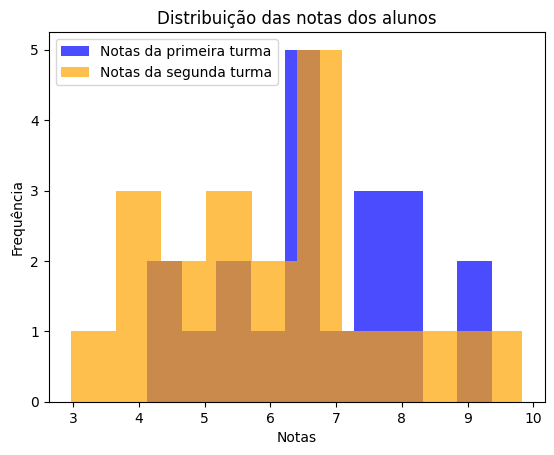

In [28]:
plt.hist(df_turma_A['Nota'], color="blue", alpha=0.7, label='Notas da primeira turma')
plt.hist(df_turma_B['Nota'], color='orange', alpha=0.7, label='Notas da segunda turma')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Distribuição das notas dos alunos')
plt.legend()
plt.show()

In [29]:
from scipy.stats import ttest_ind

In [30]:
stats, p_value = ttest_ind(df_turma_A['Nota'], df_turma_B['Nota'], alternative='greater')

In [31]:
if (stats < 0) and ( p_value/2<0,5):
  print("A hipótese nula deve ser rejeitada")
else:
  print('A hipótese nula deve ser aceita')

A hipótese nula deve ser aceita


#**Nossa decisão pode ser alterada, dependendo do rigor com a qual a estabelecemos.**

> Valor-p: Representa a possibilidade de se obter um teste t igual ou distante do observado, assumindo que a hipótese nula é verdadeira. Dito de outra forma, representa a probabilidade de observarmos uma média da amostra tão ou mais discrepante do que a hipotética.

> T-stat: Represents the standard deviation numbers between the sample mean and the hypothetical average.




# **Test for two paired samples:**

* In a new situation, we will apply the tests in a case where we subject the same group of students to different study methodologies.

In [32]:
# Alunos da mesma turma
alunos = [f'Aluno_{i+1}' for i in range(20)]

# Notas antes da metodologia — notas com desempenho mais baixo
notas_antes = np.random.normal(loc=12, scale=4, size=20)
notas_antes = np.clip(np.round(notas_antes), 1, 20).astype(int)

# Notas depois da nova metodologia — melhor desempenho esperado
melhoria = np.random.normal(loc=3, scale=2, size=20)
notas_depois = notas_antes + np.round(melhoria)
notas_depois = np.clip(notas_depois, 1, 20).astype(int)

# Criando os DataFrames
df_antes = pd.DataFrame({'Aluno': alunos, 'Nota_Antes': notas_antes})
df_depois = pd.DataFrame({'Aluno': alunos, 'Nota_Depois': notas_depois})

# Juntando os dados em um único DataFrame
df_avaliacoes = pd.concat([df_antes.set_index('Aluno'), df_depois.set_index('Aluno')], axis=1).reset_index()

print(df_avaliacoes)


       Aluno  Nota_Antes  Nota_Depois
0    Aluno_1          15           17
1    Aluno_2          13           16
2    Aluno_3          12           13
3    Aluno_4          11           12
4    Aluno_5           6           11
5    Aluno_6           9           15
6    Aluno_7          10           13
7    Aluno_8          16           20
8    Aluno_9          13           17
9   Aluno_10           5            7
10  Aluno_11          13           17
11  Aluno_12          10           16
12  Aluno_13           9           12
13  Aluno_14          14           20
14  Aluno_15          16           14
15  Aluno_16          16           20
16  Aluno_17           9           12
17  Aluno_18          11           13
18  Aluno_19          13           16
19  Aluno_20          16           15


In [33]:
# Let's verify the median between the datas and how much they are approximated.

diferenca = [b - a for a, b in zip(df_avaliacoes['Nota_Antes'], df_avaliacoes['Nota_Depois'])]
diferenca

[2, 3, 1, 1, 5, 6, 3, 4, 4, 2, 4, 6, 3, 6, -2, 4, 3, 2, 3, -1]

# **Let´s apply the following test:**

$ H_0: \mu_d = 0 $

$ H_1: \mu_d > 0 $

Where $μ_d$ means the average of the paired samples.

In [34]:
from scipy.stats import ttest_rel

In [35]:
stats, p_valor = ttest_rel(df_avaliacoes['Nota_Depois'], df_avaliacoes['Nota_Antes'], alternative='greater')
if p_valor/2 < 0.05:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese nula aceita')


Hipótese nula rejeitada


# Now let's check, based on two small samples, whether the new methodology makes a difference if applied to another group of students.

In [42]:
turma_a = [5,10,15,20,20,15,10,5]
turma_b = [10,20,15,10,15,15,20,20]

In [37]:
from scipy.stats import mannwhitneyu

We will apply the following tests to these data groups:


$H_0$: Equal population distribution.

$H_1$: Different population distribution.


They are: Unpaired and independent.


In [43]:
stats, p_valor = mannwhitneyu(turma_a, turma_b, alternative='two-sided')
print(f'Estatística de teste:{stats}\nP-valor:{p_valor}')

Estatística de teste:22.0
P-valor:0.29956876213044537


In [39]:
if p_valor/2 <0.05:
  print('Rejeitar a hipótese nula')
else:
  print('Aceitar a hipótese nula')

Aceitar a hipótese nula


# Let´s apply a test in two paired samples.

# We have a group of students who slept between 5 and 6 hours a night before the first test, and by the second test, they slept more than 8 hours.

# The hipothesys are:
$H_0$: The median of the data difference is zero.

$H_1$: They are not zero.

In [45]:
beforeAdjust = [10,15,9,8,10,18,15,10]
afterAdjust = [15,20,16,18,20,20,18,15]

In [44]:
from scipy.stats import wilcoxon

In [47]:
stats, p_valor = wilcoxon(afterAdjust, beforeAdjust, alternative='greater')
if p_valor < 0.05:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese nula aceita')

Hipótese nula rejeitada


# **In this case, we found that a good sleep schedule before taking the exam promotes better performance on the test.**